<a href="https://colab.research.google.com/github/marianatorres4/TutorCove/blob/main/CCC_Temperature_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CJI-SPI-CCC Lab: Ocean temperature evolution in Crystal Cove**
by Mariana Torres and Julia Lenhardt


---
This notebook aims to show you an example of how to analyze and plot temperature timeseries using Python

**(*...continued from the [CJI-SPI-CCC Tutorial document](https://docs.google.com/document/d/1OIDy2-469NoG-pw7Gha1jlDJRbtxAn1YTGTFmDhkEDw/edit?tab=t.0)*)**

Great! You've created a Python notebook. Here are the next steps:

6. Click the "Connect" button in the upper-right corner of this Google Colab page.

Now, you are ready to code :)
# **Part 1: Background info**

### **⛁ About the data:**
We are using [Spray Glider](https://spraydata.ucsd.edu/about/spray-glider) data from the [California Underwater Glider Network (CUGN)](https://spraydata.ucsd.edu/projects/cugn/#about-project-dataset). These gliders repeatedly dive from the surface to 500 m and back along a path (Figure 1).

The file provided in this exercise is a CSV file which stands for Comma-Separated Values. It’s like a big table of information, just like what you see in Google Sheets or Excel, but all the data is saved in plain text using commas to separate each piece of information. The `.csv` file corresponds to one of the four traditional cross-shore [CalCOFI](https://calcofi.org/) lines, in this case `Line 90` is right off Dana Point.

<div style="text-align: center;">
  <img src="https://raw.githubusercontent.com/marianatorres4/TutorCove/main/figures/CalCOFI-lines.png" width="300" alt="CalCOFI sampling lines along the California coastline">
  <p><strong>Figure 1:</strong> Map of the CalCOFI sampling lines (in white) along the Southern California coastline.</p>
</div>

#### 🔎 More about CSV files:

*You can skip this section and come back to it later if you would like*

A **CSV (Comma-Separated Values)** file is a simple way to store data in a table format. Each line of the file represents a row in the table, with values separated by commas. CSV files are widely used for storing time-series data, such as temperature, salinity, nutrient concentractions, etc. In our case it's temperature data.

The table below is an example of how a CSV table would look like:

|Date|Latitude|Longitude|Temperature (°C)|
|-------|-------|-------|------------------|
|10/19/06|33.24|-117.63| 17.8|
|10/20/06|33.22|-117.64| 18.1|
|10/21/06|33.20|-117.66| 18.3|
|10/22/06|33.18|-117.68| 19.1|

**CSV** files are easy to read and can be opened by tools like Excel or processed by programming languages like Python.



### **🐍 Getting started with Python code**

Jupyter notebook allows you to use **code cells** of python script that can be executed in real time.

To see this, copy (right-click or Ctrl + C on a PC and ⌘ + C on a Mac) the text below and paste (Ctrl + V on a PC and ⌘ + V on a Mac) it on the next cell

```
string = "Hello world!"
print(string)
```

When you are finished, to execute, press **SHIFT + ENTER** to run the cell (or click the play button on the upper-left side of the cell).

In [ ]:
# paste here
string = "Hello world!"
print(string)

Hello world!


Below is a second example that computes a value, stores it in a variable, and prints the result:

(to execute press SHIFT + ENTER)

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

# Optional: In a new cell, try multiplying seconds_in_a_day * 7 to get a new variable "seconds_in_a_week"

86400

### 📚 Libraries

Python makes extensive use of freely available, open source *libraries*, which contain lots of useful functions that you can make use of. The following python code calls some standard libraries:

* `pandas`: handles structured data (DataFrames)
* `numpy`: contains useful functions for carrying out numerics
* `matplotlib` allows us to plot data
* `cartopy`: provides tools for geospatial data visualization and mapping, with support for projections and geographic features.
* `cmocean`: this library has cool colormaps designed for oceanographic and geospatial data
* `ipywidgets`: allows us to create interactive widgets in Jupyter Notebooks to dynamically update visualizations or analyses.

Since we will be using some of these libraries repeatedly, we will abbreviate their names to `pd`, `np` and `plt`.

If you run the cell below and get an error about a library not being installed like shown below

```python
ModuleNotFoundError: No module named 'cartopy'
```
You can install the library using

```python
%pip install cartopy cmocean
```
or follow the instruction on the NOTE that appears when the error is raised.

# **Part 2: Explore data**

Import/install libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Install required libraries if not already installed
%pip install cartopy cmocean
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean
from ipywidgets import interact, IntSlider

Load the `csv` file described previously:

In [29]:
da = pd.read_csv("https://spraydata.ucsd.edu/erddap/tabledap/binnedCUGN90.csvp?time%2Clatitude%2Clongitude%2Ctemperature&depth%3C=10&time%3E=2006-10-19T17%3A51%3A00Z&time%3C=2024-07-30T16%3A37%3A04Z")
da.head(10) # this allows you to see the first 10 rows of the dataset. da.tail(5) would let you see the last 5 rows of the dataset

,time (UTC),latitude (degrees_north),longitude (degrees_east),temperature (degree_C)
0,2006-10-19T17:51:00Z,33.437250,-117.728130,17.726100
1,2006-10-19T18:32:02Z,33.435890,-117.733440,17.929889
2,2006-10-19T19:34:28Z,33.435570,-117.743385,17.846000
3,2006-10-19T20:44:14Z,33.439380,-117.752662,18.189400
4,2006-10-19T22:20:32Z,33.448135,-117.762028,18.253846
5,2006-10-20T00:07:12Z,33.458208,-117.771282,18.460846
6,2006-10-20T01:51:47Z,33.469062,-117.780767,18.410538
7,2006-10-20T03:30:58Z,33.476690,-117.774203,18.181923
8,2006-10-20T04:27:42Z,33.476490,-117.774300,18.389273
9,2006-10-20T05:56:18Z,33.473280,-117.789023,18.336400


The dataset `da` above corresponds to the ocean temperature readings at a depth of 10m.

We'll rename each column name in our dataset to a more simple one using the `pd.rename` method:

In [30]:
da.rename(columns={
    "time (UTC)": "time",
    "latitude (degrees_north)": "lat",
    "longitude (degrees_east)": "lon",
    "temperature (degree_C)": "temp"
}, inplace=True)
da

,time,lat,lon,temp
0,2006-10-19T17:51:00Z,33.437250,-117.728130,17.726100
1,2006-10-19T18:32:02Z,33.435890,-117.733440,17.929889
2,2006-10-19T19:34:28Z,33.435570,-117.743385,17.846000
3,2006-10-19T20:44:14Z,33.439380,-117.752662,18.189400
4,2006-10-19T22:20:32Z,33.448135,-117.762028,18.253846
...,...,...,...,...
59156,2024-07-30T13:29:45Z,33.162447,-117.705430,17.746467
59157,2024-07-30T14:25:46Z,33.156733,-117.708722,15.692083
59158,2024-07-30T15:13:21Z,33.152445,-117.711650,19.319600
59159,2024-07-30T16:00:40Z,33.148758,-117.715065,19.262182


### Next, run the cell below to see where the measurements were taken:

Once you run it you'll notice the following:

1. **A map:** You've used the [cartopy package](https://scitools.org.uk/cartopy/docs/latest/) to show the West coast of the US and Mexico
2. **Data points:** The points on the map represent the locations where the temperature data was taken. Each color indicates the temperature value at that location.
3. **A colorbar:** This helps interpret the data by matching the colors with the temperature values. Dark blue represents cooler temperatures (approx. 12°C), while yellow represent warmer (approx. 23°C) ones.



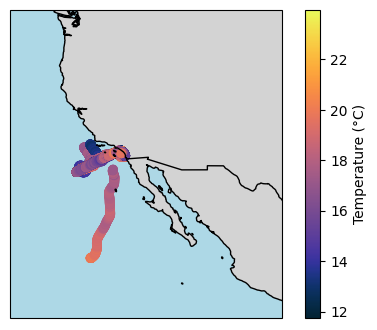

In [31]:
plt.figure(figsize=(6, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()

ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=1)
ax.add_feature(cfeature.LAND, facecolor="lightgray")
ax.add_feature(cfeature.OCEAN, facecolor="lightblue")

pc = ax.scatter(da["lon"], da["lat"], c=da["temp"], cmap= cmocean.cm.thermal, transform=ccrs.PlateCarree())
plt.colorbar(pc, label= "Temperature (°C)")

ax.set_xlim((-130, -100))
ax.set_ylim((15, 49))

plt.show()

🕰️ We next convert the date values to **datetime objects**. This makes sure that the `time` column in the dataset is properly recognized as, well, time. This now allows you to perform various time-related operations such as grouping or extracting components (e.g., year, month, day), etc.


📈 We also add a new column to `da` called `smooth_temp` that contains a smoother observed temperature curve. This helps reduce short-term fluctuations or noise in the data, allowing for a clearer visualization of long-term trends when plotting the timeseries.

In [32]:
da["time"] = pd.to_datetime(da["time"])
da["smooth_temp"] = da["temp"].rolling(window=90, center=True).mean()
da = da.sort_values(by="time")
da = da.drop_duplicates(subset=["time"])
da = da.dropna(subset=["time", "temp"])

da["day_of_year"] = da["time"].dt.dayofyear
da["year"] = da["time"].dt.year

time_numeric = da["time"].map(pd.Timestamp.toordinal)
slope, intercept = np.polyfit(time_numeric, da["temp"], 1)
trendline = slope * time_numeric + intercept

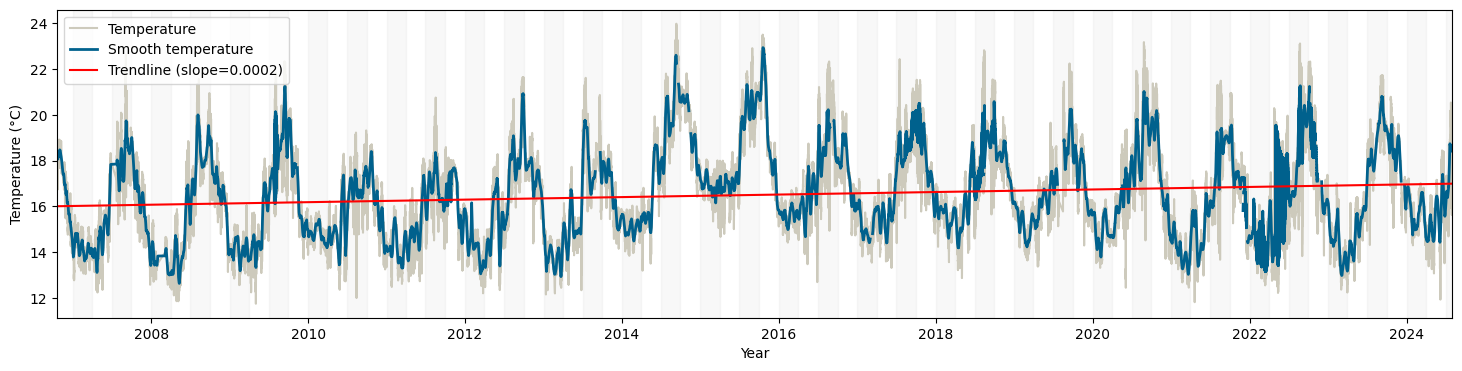

Slope of the trendline: 0.0002
The temperature is increasing over time.


In [33]:
plt.figure(figsize=(18, 4))


for year in range(da["time"].dt.year.min(), da["time"].dt.year.max() + 1):
    for quarter_start, quarter_end in [("01-01", "03-31"), ("04-01", "06-30"), ("07-01", "09-30"), ("10-01", "12-31")]:
        if quarter_start in ["01-01", "07-01"]:
            plt.axvspan(
                pd.Timestamp(f"{year}-{quarter_start}"), pd.Timestamp(f"{year}-{quarter_end}"),
                color="gray", alpha=0.05
            )

plt.plot(da["time"], da["temp"], color="#CDCABC", linewidth=1.5, alpha=1, label="Temperature")
plt.plot(da["time"], da["smooth_temp"], color="#00618D", linewidth=2, label="Smooth temperature")
plt.plot(da["time"], trendline, color="red", label=f"Trendline (slope={slope:.4f})")

plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.xlim(da.time.values[0], da.time.values[-1])
plt.legend()
plt.show()

print(f"Slope of the trendline: {slope:.4f}")
if slope > 0:
    print("The temperature is increasing over time.")
else:
    print("The temperature is decreasing over time.")

What do you notice from the plot above?

*   **Seasonality:** The figure shows a clear annual cycle, where the warmest temperatures occur in the summer months, while the coldest ones occur in the winter.

*   **Extremes:** By plotting temperature over time we can see that some years are warmer than others. In this case years 2014 & 2015 seem to be warmest.

*   **Slighlty increasing trend:** By fitting a trendline we show that since 2006, surface temperatures have been slowly increasing.

**🔴 Add your own thoughts here**

*   List item
*   List item

Since we're noticing some years are warmer or colder than others, we can group the temperature data by the day of the year and directly compare each year to each other.

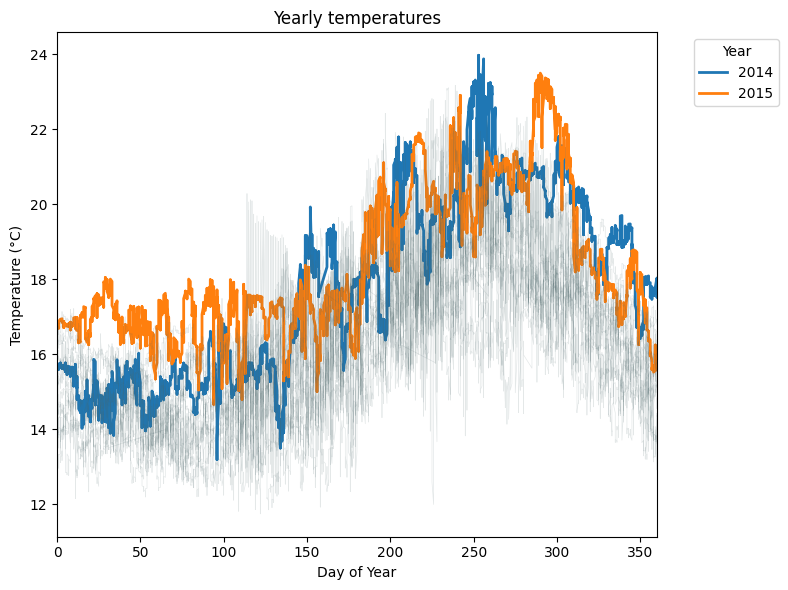

In [45]:
plt.figure(figsize=(8, 6))

for year, group in da.groupby("year"):
    if year in [2014, 2015]:
        plt.plot(group["day_of_year"], group["temp"], label=f"{year}", linewidth=2, alpha=1)
    else:
        plt.plot(group["day_of_year"], group["temp"], color="#4b6669", linewidth=0.5, alpha=0.15)

plt.xlabel("Day of Year")
plt.ylabel("Temperature (°C)")
plt.title("Yearly temperatures")
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xlim(0,360)
plt.tight_layout()
plt.show()

The cells below create a function that can do the latter, but in this case you can move the widget values to highlight a year you are interested in:

In [36]:
def plot_year(selected_year):
    plt.figure(figsize=(5, 5))

    for year, group in da.groupby("year"):
        if year == selected_year:
            plt.plot(group["day_of_year"], group["temp"], label=f"{year}", linewidth=2, alpha=1, color="#1c618a")
        else:
            plt.plot(group["day_of_year"], group["temp"], color="#4b6669", linewidth=0.5, alpha=0.15)

    plt.xlabel("Day of Year")
    plt.ylabel("Temperature (°C)")
    plt.title(f"Yearly temperatures")
    plt.legend(title="Year Selected",loc="upper right",frameon=True)
    plt.xlim(0, 365)
    plt.tight_layout()
    plt.show()

After running the cell below, interact with the widget to explore how each year differs from the others. This will allow you to observe the variability and trends across different years.

In [37]:
interact(
    plot_year,
    selected_year=IntSlider(
        min=da["year"].min(),
        max=da["year"].max(),
        step=1,
        value=2014,
        description="Year"
    )
);

yearly_max_temp = da.groupby("year")["temp"].max()

warmest_years = yearly_max_temp.sort_values(ascending=False).head(2)
temp_selected_year = da[da["time"].dt.year.isin(warmest_years.index)]

print("The warmest years :")
for year, temp in warmest_years.items():
    print(f"Year: {year}, Max Temperature: {temp:.2f} °C")

interactive(children=(IntSlider(value=2014, description='Year', max=2024, min=2006), Output()), _dom_classes=(…

The warmest years :
Year: 2014, Max Temperature: 23.97 °C
Year: 2015, Max Temperature: 23.49 °C


The plot highlights 2014 and 2015 as the warmest years, with temperatures approaching 24°C.

📖 This is interesting because it checks out with a severe warm anomaly reported in the Pacific Coast called ["The Blob"](https://www.science.org/content/article/blob-heat-wave-killed-millions-seabirds-and-they-haven-t-bounced-back), a marine heatwave that persisted for several years. This event had widespread oceanographic, biological, and socioeconomic impacts.

In Southern California, "The Blob" had lasting effects on [kelp forest ecosystems](https://www.nature.com/articles/s42003-022-04107-z), leading to changes in community structure and species invasions. These disruptions suggest an ongoing, climate-driven shift in California's kelp forests.

---



### 🚦 **What we have accomplished:**

1. Loaded and processed a `csv` file:
- Renamed columns in the DataFrame
- Converted dates to numeric values
- Added a column to the `da` with smoothed temperature values for better visualization when plotting
- Fitted a trendline (Linear Regression) to the raw temperature data


2. Created a spatial map to visualize where the measurements were taken

3. Made a plot of temperature evolution
- Noticed seasonality and identified that the warmest years were 2014 and 2015.

4. Grouped the temperature data by day of the year to directly compare yearly curves

### 🚦 **What you can do:**
- Try loading a different depth
- Try looking at temperature at different location (another CUGN line)



---



## ⚠️ *You can stop here or keep going*

---



# **Part 3. Interested in learning more about Marine Heatwaves (MHWs)?**

#### Follow this basic MHW detection workflow

**Backgroud:** Based on our analysis, we've seen that years 2014 and 2015 were quite warm. How do we know if they were *extemely* warm?

When analyzing extreme events such as MHWs, it's important to [define them clearly](https://www.nature.com/articles/d41586-023-00924-2). There is much debate in the MHW community about how to best do so.

One common perspective is that the definition should depend on the research question. For example:

- Are you interested in studying the biological impacts of MHWs? Such as species-specific studies
- Are you focused on a specific region with unique seasonal patterns, requiring an specific approach? Or,
- Are you studying their physical drivers or looking for large-scale climate signals?

In this basic case, we will use a slightly modified version of the widely accepted definition first introduced by [Hobday et al. 2016](https://www.sciencedirect.com/science/article/pii/S0079661116000057).

This definition considers a Marine Heatwave (MHW) as a period of anomalously warm water lasting for five or more days, with temperatures exceeding the 90th percentile based on a 30-year historical baseline period (Figure 2). Our modification is to include 1-day events as MHWs.

<div style="text-align: center;">
  <img src="https://osu-wams-blogs-uploads.s3.amazonaws.com/blogs.dir/2115/files/2020/03/Heatwave_schematic-1024x555.png" width="500" alt="CalCOFI sampling lines along the California coastline">
<p><strong>Figure 2:</strong> Statistical definition of a Marine Heatwave as defined by <a href="https://doi.org/10.5670/oceanog.2018.205" target="_blank">Hobday et al. 2018</a>.</p>
</div>

---


### 🌡️ **Our MHW Workflow:**

1. Calculate the climatology defined as `clim`
*A note of caution*: Since we do not have a full 30-year time series, the climatology may not be entirely accurate. However, we will proceed with the available data while acknowledging this limitation.

2. Calculate the 90th percentile threshold defined as `thresh`

3. Visualize MHW events as the difference between `thresh` and `clim`.





In [39]:
clim = da.temp.groupby(da.time.dt.dayofyear).mean()
full_clim_timeseries = da.time.dt.dayofyear.map(clim)
da["clim"] = full_clim_timeseries

thresh = da.temp.groupby(da.time.dt.dayofyear).quantile(0.90) # you can change the threshold value
full_clim_thresh_timeseries = da.time.dt.dayofyear.map(thresh)
da["thresh"] = full_clim_thresh_timeseries

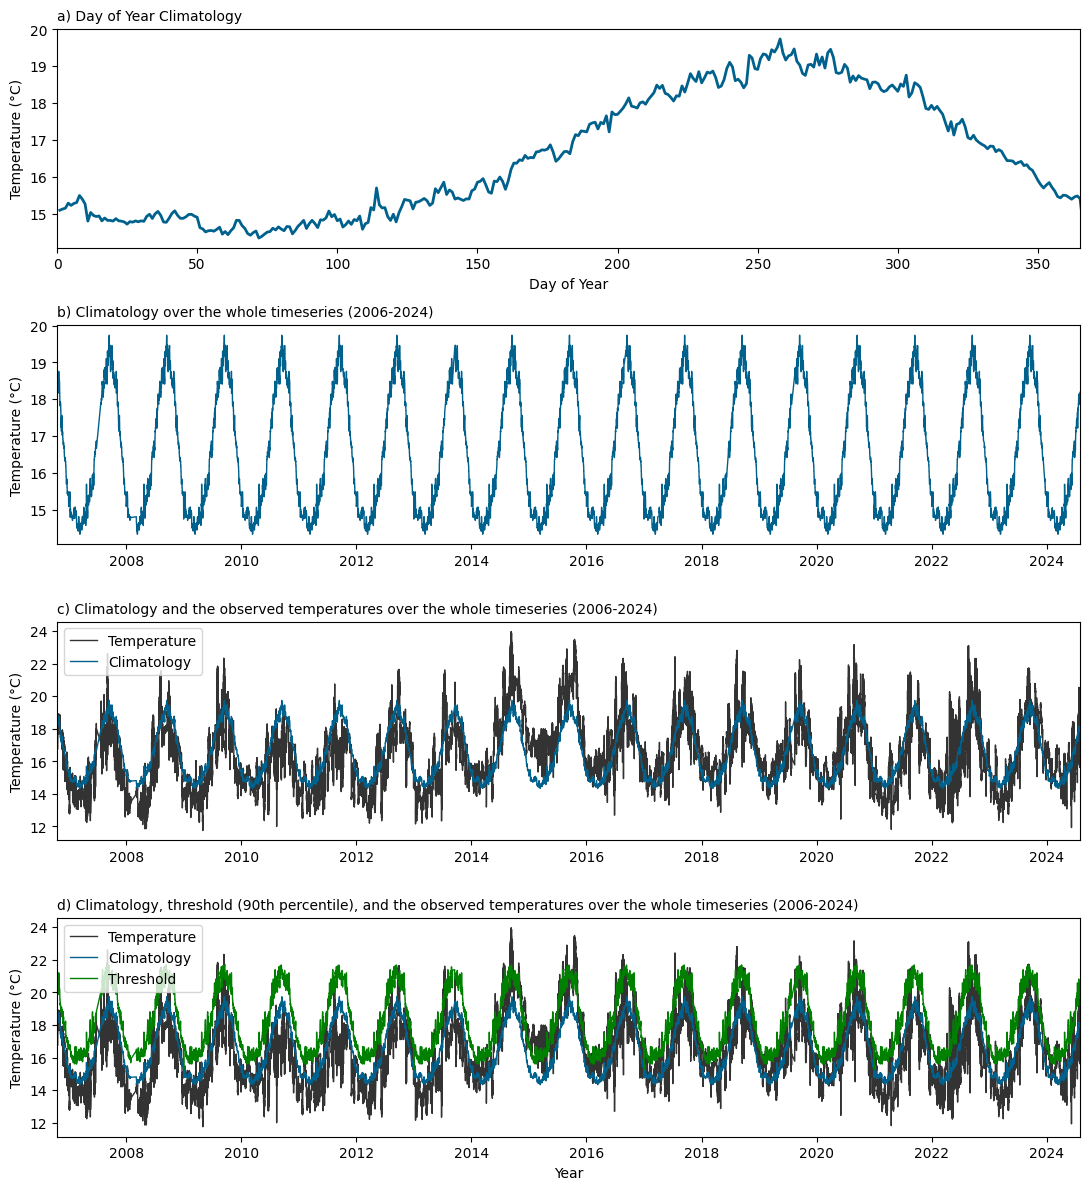

In [40]:
plt.figure(figsize=(11, 12))

ax1 = plt.subplot(4, 1, 1)
clim.plot(color="#00618D", linewidth=2)
plt.xlim(0, 365)
plt.xlabel("Day of Year")
plt.ylabel("Temperature (°C)")
plt.text(0, 1.04, "a) Day of Year Climatology", transform=ax1.transAxes, fontsize=10)

ax2 = plt.subplot(4, 1, 2)
plt.plot(da["time"], da["clim"], label="Climatology", color="#00618D", linewidth=1)
plt.xlim(da.time.values[0], da.time.values[-1])
plt.xlabel("")
plt.ylabel("Temperature (°C)")
plt.text(0, 1.04, "b) Climatology over the whole timeseries (2006-2024)", transform=ax2.transAxes, fontsize=10)

ax3 = plt.subplot(4, 1, 3)
plt.plot(da["time"], da["temp"], label="Temperature", color="k", linewidth=1,alpha=0.8)
plt.plot(da["time"], da["clim"], label="Climatology", color="#00618D", linewidth=1)
plt.xlim(da.time.values[0], da.time.values[-1])
plt.xlabel("")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.text(0, 1.04, "c) Climatology and the observed temperatures over the whole timeseries (2006-2024)", transform=ax3.transAxes, fontsize=10)

ax4 = plt.subplot(4, 1, 4)
plt.plot(da["time"], da["temp"], label="Temperature", color="k", linewidth=1, alpha=0.8)
plt.plot(da["time"], da["clim"], label="Climatology", color="#00618D", linewidth=1)
plt.plot(da["time"], da["thresh"], label="Threshold", color="g", linewidth=1)
plt.xlim(da.time.values[0], da.time.values[-1])
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.text(0, 1.04, "d) Climatology, threshold, and the observed temperatures over the whole timeseries (2006-2024)", transform=ax4.transAxes, fontsize=10)

plt.tight_layout()
plt.show()


The first 2 steps of the MHW Worflow are complete. Let's now visualize the MHW events by zooming into the years of "The Blob" (2014-2015)

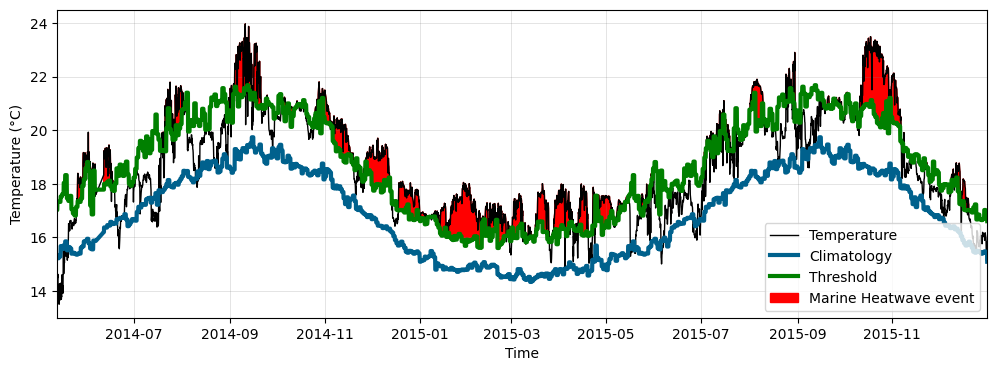

In [44]:
plt.figure(figsize=(12, 4))
plt.plot(da["time"], da["temp"], label="Temperature", color="k", linewidth=1)
plt.plot(da["time"], da["clim"], label="Climatology", color="#00618D", linewidth=3)
plt.plot(da["time"], da["thresh"], label="Threshold", color="g",linewidth=3)

plt.fill_between(
    da["time"],
    da["temp"],
    da["thresh"],
    where=(da["temp"] > da["thresh"]),
    color="red",
    alpha=1,
    label="Marine Heatwave event"
)

plt.xlim(da["time"].loc[da.time.dt.year == 2014].values[1099],da["time"].loc[da.time.dt.year == 2015].values[-1])
plt.ylim(13,24.5)
plt.grid(
    which="both",
    linewidth=0.5,
    color='gray',
    alpha=0.3
    )

plt.xlabel("Time")
plt.ylabel("Temperature (°C)")

plt.legend(loc="lower right", frameon=True)
plt.show()

### You've successfully visualized MHWs! Here's what you could do to expand the analysis:



*   Change the `thresh` value to a higher one to see the when the most extreme events occured. Simply change the .90 to a higher percentile and rerun the cells.
*   Look at a different time period
* What about extremely cold temperatures? Using a similar approach, try to visualize cold-spells.

The Marine Heatwave community is growing and researchers are developing new ways to communicate, detect, characterize, and follow these warm water blobs.

---

End

